# Walidacja modeli

In [1]:
from IPython.display import display, Markdown, Latex

# Walidacja modeli i zapobieganie przeuczeniu

## Wprowadzenie

Walidacja modeli to istotny element procesu budowania systemów uczenia maszynowego. Pozwala ocenić, jak dobrze model będzie działał na nowych, do tej pory niewidzianych danych.

Przeuczenie (overfitting) to sytuacja, w której model zbyt dobrze dopasowuje się do danych treningowych, tracąc zdolność generalizacji.

## Podstawowe techniki walidacji

### 1. Podział danych na treningowe (train) i testowe (test)
Najprostsza metoda - dane dzielimy na zbiór treningowy i testowy (zazwyczaj 70-30 lub 80-20).

### 2. Walidacja krzyżowa (Cross-validation)
Dane dzielimy na $k$ części ("folds"). Model trenujemy $k$ razy, za każdym razem używając innej części jako zbioru testowego.

### 3. "Stratified K-Fold"
Wariant walidacji krzyżowej ("k-fold"), który zachowuje proporcje klas w każdym części, to jest szczególnie ważne przy niezbalansowanych zbiorach danych.

## Metryki oceny modeli

- **Klasyfikacja**: dokładność (accuracy), precyzja (precision), czułośc (recall), punktacja F1, krzywa ROC-AUC
- **Regresja**: MSE, RMSE, MAE, R², MAPE
- **Klasteryzacja**: "silhouette score", indeks Daviesa-Bouldina, indeks Calińskiego-Harabasza

## Techniki zapobiegania przeuczeniu

### 1. Regularyzacja
Dodanie kary za zbyt skomplikowany model (metody: L1, L2, Elastic Net).

### 2. Wczesne zatrzymanie uczenia
Zatrzymanie uczenia, gdy wyniki na zbiorze walidacyjnym przestają się poprawiać.

### 3. Dropout (dla sieci neuronowych)
Losowe wyłączanie neuronów podczas treningu.

### 4. Ograniczenie złożoności modelu
Redukcja liczby parametrów, głębokości drzew decyzyjnych itp.

### 5. "Wzmocnienie" (augmentation) danych
Zwiększenie różnorodności zbioru treningowego poprzez transformacje danych.

## Przykłady








## Przykład 1: Klasyfikacja - walidacja krzyżowa i krzywe uczenia


Kształt danych treningowych: (455, 30)
Kształt danych testowych: (114, 30)

Rozkład klas w zbiorze treningowym: [170 285]
Rozkład klas w zbiorze testowym: [42 72]

WALIDACJA KRZYŻOWA (5-fold)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c


Regresja logistyczna:
  Wyniki dla każdego 'foldu': [0.97802198 0.93406593 0.92307692 0.94505495 0.93406593]
  Średnia dokładność: 0.9429 (+/- 0.0378)

Las losowy (bez regularyzacji):
  Wyniki dla każdego 'foldu': [0.96703297 0.98901099 0.92307692 0.93406593 0.95604396]
  Średnia dokładność: 0.9538 (+/- 0.0469)

Las losowy (z regularyzacją):
  Wyniki dla każdego 'foldu': [0.97802198 0.97802198 0.92307692 0.93406593 0.95604396]
  Średnia dokładność: 0.9538 (+/- 0.0448)

KRZYWE UCZENIA


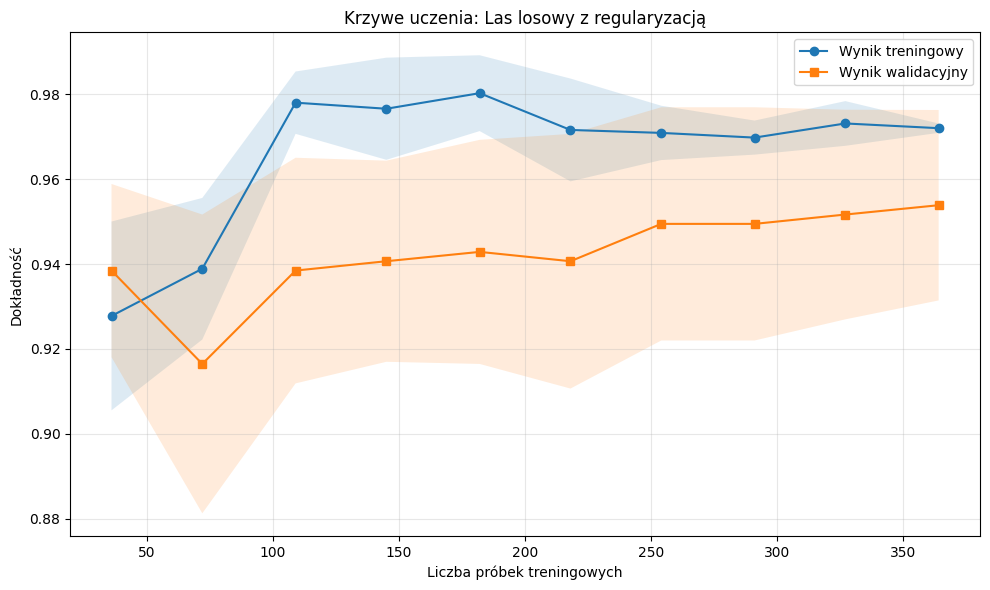


OCENA NA ZBIORZE TESTOWYM

Raport klasyfikacji:
              precision    recall  f1-score   support

   malignant       0.91      0.93      0.92        42
      benign       0.96      0.94      0.95        72

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114



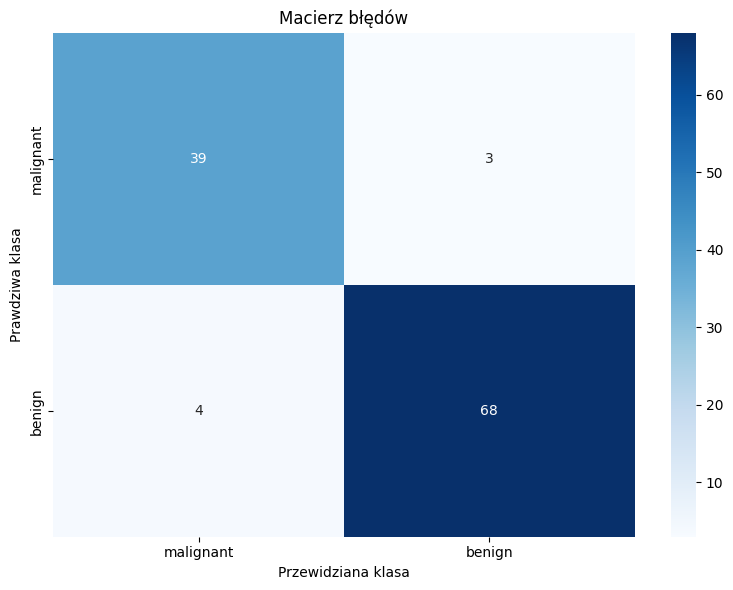


Wnioski:
- Model z regularyzacją zapobiega przeuczeniu poprzez ograniczenie złożoności
- Walidacja krzyżowa daje bardziej wiarygodną ocenę niż pojedynczy podział
- Krzywe uczenia pomagają zdiagnozować problemy z niedouczeniem/przeuczeniem


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score, learning_curve, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Załadowanie danych (związanych z rakiem piersi; dane te dostępne są
# w zbiorach danych w module scikit-learn)
data = load_breast_cancer()
X, y = data.data, data.target

# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Kształt danych treningowych:", X_train.shape)
print("Kształt danych testowych:", X_test.shape)
print("\nRozkład klas w zbiorze treningowym:", np.bincount(y_train))
print("Rozkład klas w zbiorze testowym:", np.bincount(y_test))

# Model 1: Prosty model (regresja logistyczna - może być niedouczony)
simple_model = LogisticRegression(max_iter=1000, random_state=42)

# Model 2: Model złożony (las losowy - ryzyko przeuczenia)
complex_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,  # Brak ograniczenia głębokości
    min_samples_split=2,
    random_state=42
)

# Model 3: Model z regularyzacją (balans)
regularized_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,  # Ograniczenie głębokości
    min_samples_split=20,  # Więcej próbek wymaganych do podziału
    min_samples_leaf=10,
    random_state=42
)

# Walidacja krzyżowa dla wszystkich modeli
models = {
    'Regresja logistyczna': simple_model,
    'Las losowy (bez regularyzacji)': complex_model,
    'Las losowy (z regularyzacją)': regularized_model
}

print("\n" + "="*60)
print("WALIDACJA KRZYŻOWA (5-fold)")
print("="*60)

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"\n{name}:")
    print(f"  Wyniki dla każdego 'foldu': {scores}")
    print(f"  Średnia dokładność: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")

# Funkcja do rysowania krzywych uczenia
def plot_learning_curves(model, X, y, title):
    train_sizes, train_scores, val_scores = learning_curve(
        model, X, y, cv=5,
        train_sizes=np.linspace(0.1, 1.0, 10),
        scoring='accuracy',
        n_jobs=-1
    )

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label='Wynik treningowy', marker='o')
    plt.fill_between(train_sizes, train_mean - train_std,
                     train_mean + train_std, alpha=0.15)

    plt.plot(train_sizes, val_mean, label='Wynik walidacyjny', marker='s')
    plt.fill_between(train_sizes, val_mean - val_std,
                     val_mean + val_std, alpha=0.15)

    plt.xlabel('Liczba próbek treningowych')
    plt.ylabel('Dokładność')
    plt.title(f'Krzywe uczenia: {title}')
    plt.legend(loc='best')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Rysowanie krzywych uczenia dla modelu z regularyzacją
print("\n" + "="*60)
print("KRZYWE UCZENIA")
print("="*60)
plot_learning_curves(regularized_model, X_train, y_train,
                     'Las losowy z regularyzacją')

# Trening i ocena finalnego modelu
regularized_model.fit(X_train, y_train)
y_pred = regularized_model.predict(X_test)

print("\n" + "="*60)
print("OCENA NA ZBIORZE TESTOWYM")
print("="*60)
print("\nRaport klasyfikacji:")
print(classification_report(y_test, y_pred, target_names=data.target_names))

# Macierz błędów
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.title('Macierz błędów')
plt.ylabel('Prawdziwa klasa')
plt.xlabel('Przewidziana klasa')
plt.tight_layout()
plt.show()


print("\nWnioski:")
print("- Model z regularyzacją zapobiega przeuczeniu poprzez ograniczenie złożoności")
print("- Walidacja krzyżowa daje bardziej wiarygodną ocenę niż pojedynczy podział")
print("- Krzywe uczenia pomagają zdiagnozować problemy z niedouczeniem/przeuczeniem")

## Przykład 2: Regresja - Regularyzacja i porównanie modeli

Problem: Przewidywanie cen domów w Kalifornii
Liczba cech: 8
Liczba próbek treningowych: 16512
Liczba próbek testowych: 4128

PORÓWNANIE MODELI - WALIDACJA KRZYŻOWA

Linear Regression:
  RMSE: 0.7206 (+/- 0.1220)
  R^2: 0.6115 (+/- 0.0065)

Ridge (alpha=0.1):
  RMSE: 0.7206 (+/- 0.1220)
  R^2: 0.6115 (+/- 0.0065)

Ridge (alpha=1.0):
  RMSE: 0.7206 (+/- 0.1220)
  R^2: 0.6115 (+/- 0.0065)

Ridge (alpha=10.0):
  RMSE: 0.7206 (+/- 0.1218)
  R^2: 0.6115 (+/- 0.0064)

Lasso (alpha=0.1):
  RMSE: 0.8198 (+/- 0.1175)
  R^2: 0.4971 (+/- 0.0041)

Lasso (alpha=1.0):
  RMSE: 1.1563 (+/- 0.1721)
  R^2: -0.0003 (+/- 0.0004)

ElasticNet (alpha=0.1):
  RMSE: 0.7922 (+/- 0.1142)
  R^2: 0.5305 (+/- 0.0036)

KRZYWE WALIDACYJNE - OPTYMALIZACJA PARAMETRU REGULARYZACJI


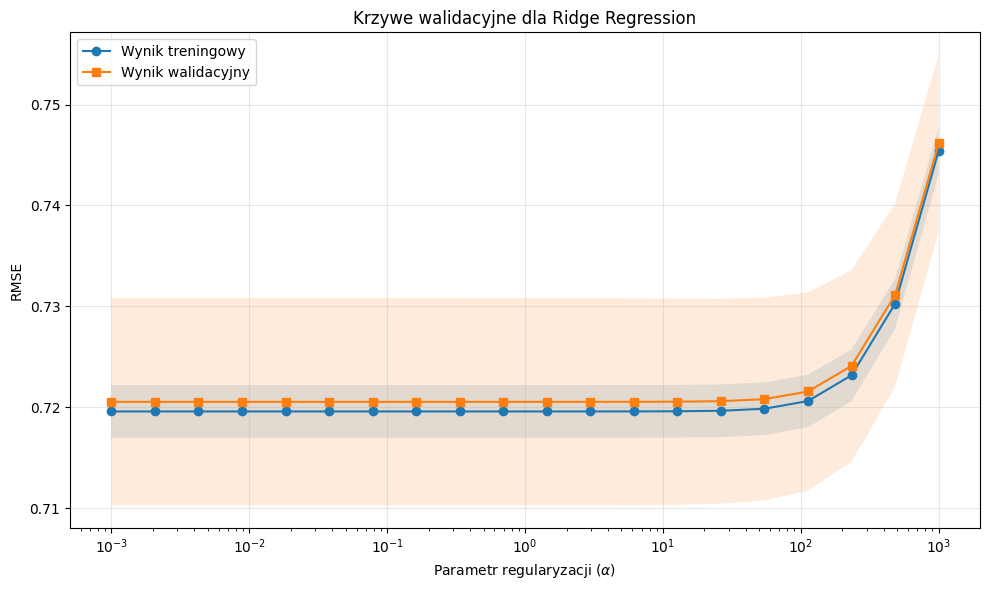


OCENA NAJLEPSZEGO MODELU NA ZBIORZE TESTOWYM

Model: Ridge Regression (alpha=1.0)
Błąd RMSE: 0.7456
Błąd MAE: 0.5332
R^2: 0.5758


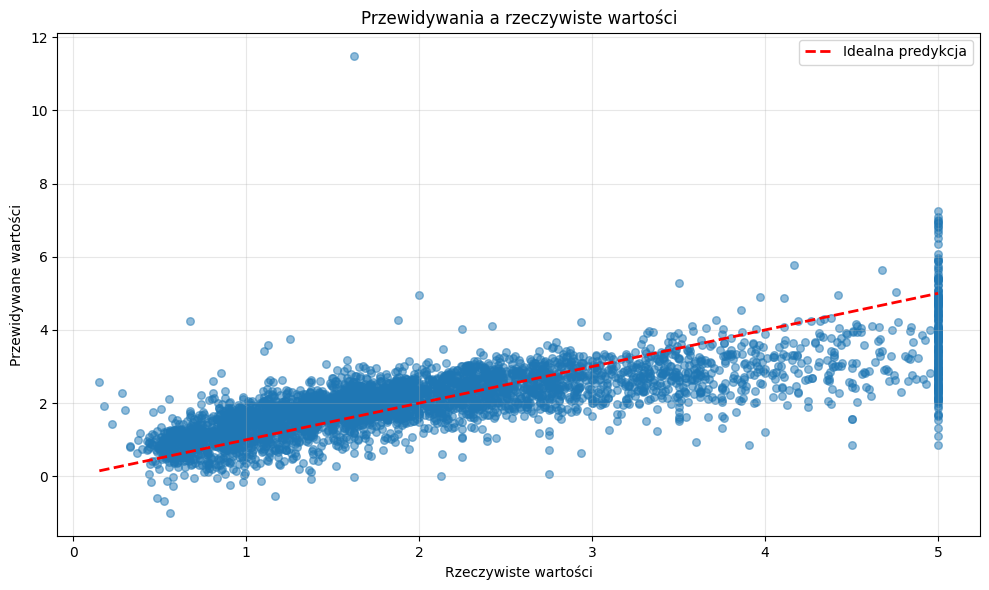

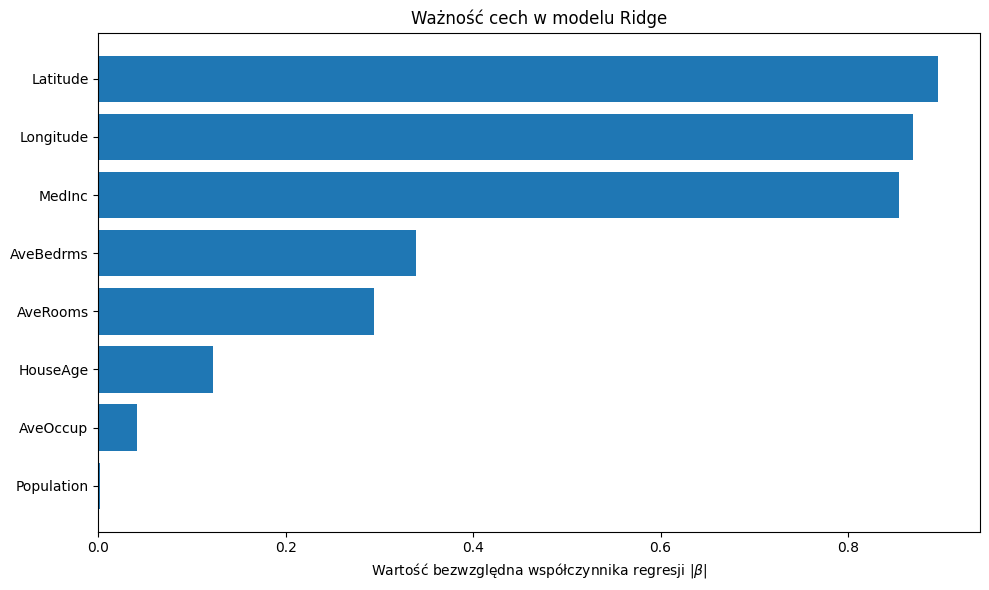


Wnioski:
- Regularyzacja Ridge zapobiega przeuczeniu poprzez penalizację dużych wag


- Zbyt mała regularyzacja ($\alpha \to 0$) może prowadzić do przeuczenia

- Zbyt duża regularyzacja ($\alpha \to \infty$) może prowadzić do niedouczenia

- Walidacja krzyżowa pomaga znaleźć optymalny poziom regularyzacji


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score, validation_curve
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline

# Załadowanie danych
# Dane te, dotyczące cen domów w Kalifornii, tworzą jeden ze standardowych
# zbiorów danych dostępnych w scikit-learn
data = fetch_california_housing()
X, y = data.data, data.target

# Podział danych
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Problem: Przewidywanie cen domów w Kalifornii")
print(f"Liczba cech: {X.shape[1]}")
print(f"Liczba próbek treningowych: {X_train.shape[0]}")
print(f"Liczba próbek testowych: {X_test.shape[0]}")

# Skalowanie cech (ważne dla regularyzacji)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Różne modele z różnym poziomem regularyzacji
models = {
    'Linear Regression': LinearRegression(),
    'Ridge (alpha=0.1)': Ridge(alpha=0.1),
    'Ridge (alpha=1.0)': Ridge(alpha=1.0),
    'Ridge (alpha=10.0)': Ridge(alpha=10.0),
    'Lasso (alpha=0.1)': Lasso(alpha=0.1),
    'Lasso (alpha=1.0)': Lasso(alpha=1.0),
    'ElasticNet (alpha=0.1)': ElasticNet(alpha=0.1, l1_ratio=0.5)
}

print("\n" + "="*70)
print("PORÓWNANIE MODELI - WALIDACJA KRZYŻOWA")
print("="*70)

results = {}
for name, model in models.items():
    # Walidacja krzyżowa z metryką MSE (ujemna, stąd negation=True)
    mse_scores = -cross_val_score(
        model, X_train_scaled, y_train,
        cv=5, scoring='neg_mean_squared_error'
    )

    # Walidacja krzyżowa z metryką R²
    r2_scores = cross_val_score(
        model, X_train_scaled, y_train,
        cv=5, scoring='r2'
    )

    results[name] = {
        'mse_mean': mse_scores.mean(),
        'mse_std': mse_scores.std(),
        'r2_mean': r2_scores.mean(),
        'r2_std': r2_scores.std()
    }

    print(f"\n{name}:")
    print(f"  RMSE: {np.sqrt(mse_scores.mean()):.4f} (+/- {np.sqrt(mse_scores.std()):.4f})")
    print(f"  R^2: {r2_scores.mean():.4f} (+/- {r2_scores.std():.4f})")

# Krzywe walidacyjne dla Ridge - zależność wyniku od parametru $\alpha$
print("\n" + "="*70)
print("KRZYWE WALIDACYJNE - OPTYMALIZACJA PARAMETRU REGULARYZACJI")
print("="*70)

param_range = np.logspace(-3, 3, 20)
train_scores, val_scores = validation_curve(
    Ridge(), X_train_scaled, y_train,
    param_name='alpha',
    param_range=param_range,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Konwersja na dodatnie wartości RMSE
train_scores = np.sqrt(-train_scores)
val_scores = np.sqrt(-val_scores)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.semilogx(param_range, train_mean, label='Wynik treningowy', marker='o')
plt.fill_between(param_range, train_mean - train_std,
                 train_mean + train_std, alpha=0.15)

plt.semilogx(param_range, val_mean, label='Wynik walidacyjny', marker='s')
plt.fill_between(param_range, val_mean - val_std,
                 val_mean + val_std, alpha=0.15)

plt.xlabel(r'Parametr regularyzacji ($\alpha$)')
plt.ylabel('RMSE')
plt.title('Krzywe walidacyjne dla Ridge Regression')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Wybór i ocena najlepszego modelu
best_model = Ridge(alpha=1.0)
best_model.fit(X_train_scaled, y_train)
y_pred = best_model.predict(X_test_scaled)

print("\n" + "="*70)
print("OCENA NAJLEPSZEGO MODELU NA ZBIORZE TESTOWYM")
print("="*70)
print(f"\nModel: Ridge Regression (alpha=1.0)")
print(f"Błąd RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")
print(f"Błąd MAE: {mean_absolute_error(y_test, y_pred):.4f}")
print(f"R^2: {r2_score(y_test, y_pred):.4f}")

# Wykres: przewidywania a rzeczywiste wartości
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, s=30)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2, label='Idealna predykcja')
plt.xlabel('Rzeczywiste wartości')
plt.ylabel('Przewidywane wartości')
plt.title('Przewidywania a rzeczywiste wartości')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Analiza wag modelu - które cechy są najważniejsze
feature_importance = np.abs(best_model.coef_)
feature_names = data.feature_names

plt.figure(figsize=(10, 6))
sorted_idx = np.argsort(feature_importance)
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx])
plt.yticks(range(len(sorted_idx)), np.array(feature_names)[sorted_idx])
plt.xlabel(r'Wartość bezwzględna współczynnika regresji $|\beta|$')
plt.title('Ważność cech w modelu Ridge')
plt.tight_layout()
plt.show()

print("\nWnioski:")
print("- Regularyzacja Ridge zapobiega przeuczeniu poprzez penalizację dużych wag")
display(Markdown(r"- Zbyt mała regularyzacja ($\alpha \to 0$) może prowadzić do przeuczenia"))
display(Markdown(r"- Zbyt duża regularyzacja ($\alpha \to \infty$) może prowadzić do niedouczenia"))
print("- Walidacja krzyżowa pomaga znaleźć optymalny poziom regularyzacji")

## Przykład 3: Klasteryzacja - Walidacja i wybór liczby klastrów

Problem: Klasteryzacja danych z nieznaną liczbą grup
Liczba próbek: 500
Liczba cech: 2

METODA ŁOKCIA - WYBÓR LICZBY KLASTRÓW
K=2: Inercja=522.16, Silhouette=0.5610, Davies-Bouldin=0.5741
K=3: Inercja=116.10, Silhouette=0.7466, Davies-Bouldin=0.3651
K=4: Inercja=28.79, Silhouette=0.7979, Davies-Bouldin=0.2819
K=5: Inercja=25.61, Silhouette=0.6785, Davies-Bouldin=0.5927
K=6: Inercja=22.89, Silhouette=0.5444, Davies-Bouldin=0.8524
K=7: Inercja=20.27, Silhouette=0.4484, Davies-Bouldin=0.9848
K=8: Inercja=17.89, Silhouette=0.3503, Davies-Bouldin=1.1111
K=9: Inercja=16.31, Silhouette=0.3494, Davies-Bouldin=1.0334
K=10: Inercja=14.83, Silhouette=0.3511, Davies-Bouldin=0.9932


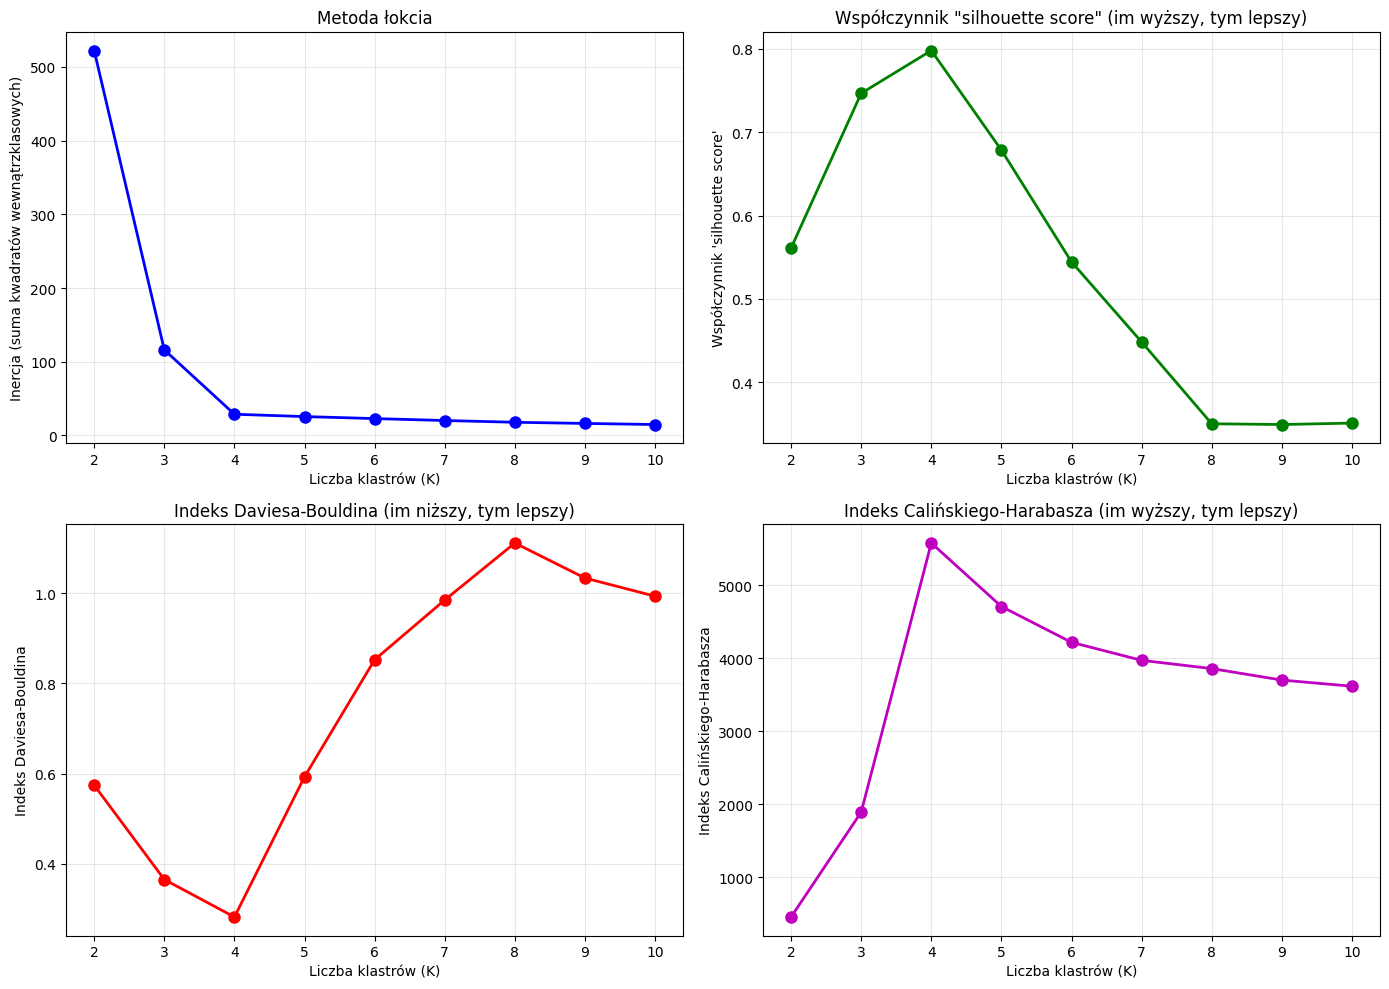


STABILNOŚĆ KLASTERYZACJI

Stabilność dla K=4:
Współczynniki 'silhouette scores' dla 5 'foldów': [np.float64(0.8140409452121117), np.float64(0.7920307734736051), np.float64(0.801057931478973), np.float64(0.7906450590589202), np.float64(0.7971469607700484)]
Średni współczynnik 'Silhouette score': 0.7990 (+/- 0.0084)

KLASTERYZACJA KOŃCOWA

Optymalna liczba klastrów: 4
Współczynnik 'Silhouette Score': 0.7979
Indeks Daviesa-Bouldina: 0.2819
Indeks Calińskiego-Harabasza: 5578.0121

Rozkład próbek w klastrach:
  Klaster 0: 125 próbek (25.0%)
  Klaster 1: 125 próbek (25.0%)
  Klaster 2: 125 próbek (25.0%)
  Klaster 3: 125 próbek (25.0%)


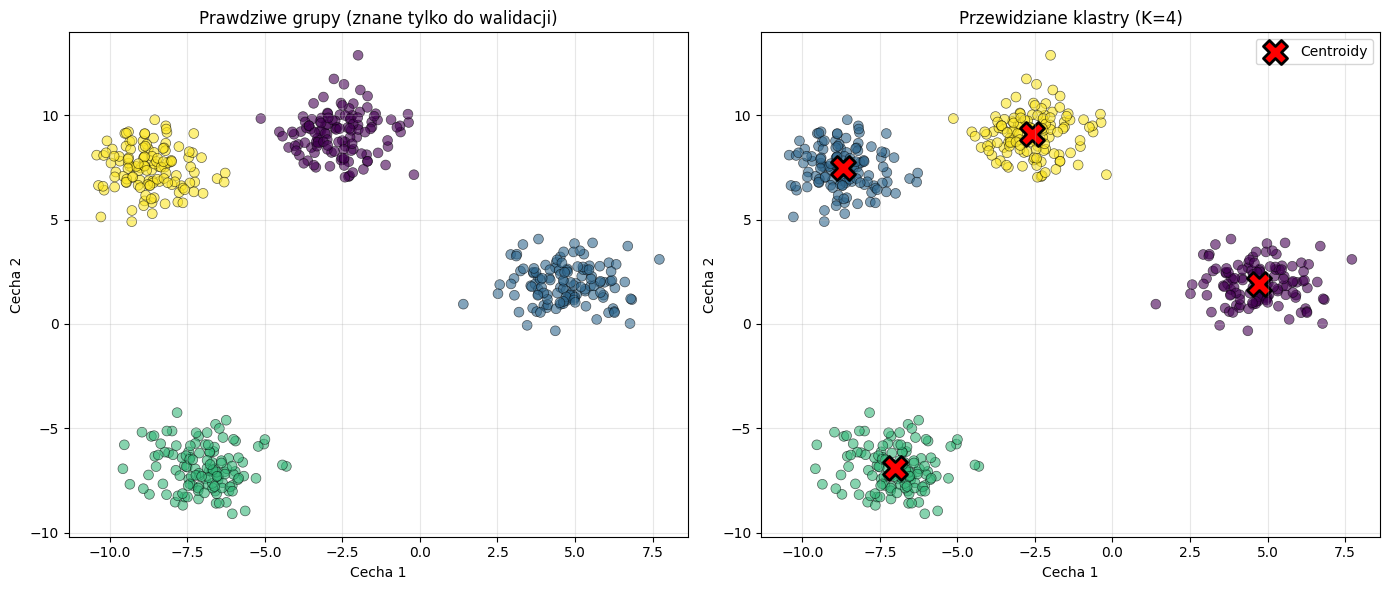


Wnioski:
- W klasteryzacji nie ma 'prawdziwych' etykiet, więc potrzebujemy metryk wewnętrznych
- 'Metoda łokcia', współczynnik 'silhouette score' i inne metryki pomagają wybrać optymalną liczbę klastrów
- Walidacja krzyżowa ocenia stabilność klasteryzacji
- Różne metryki mogą sugerować różne wartości K - należy je rozważyć razem
- Standaryzacja danych jest ważna dla algorytmów klasteryzacji opartych na odległości


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings('ignore')

# Generowanie syntetycznych danych z różną liczbą klastrów
np.random.seed(42)
X, y_true = make_blobs(
    n_samples=500,
    n_features=2,
    centers=4,
    cluster_std=1.0,
    random_state=42
)

# Skalowanie danych
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Problem: Klasteryzacja danych z nieznaną liczbą grup")
print(f"Liczba próbek: {X.shape[0]}")
print(f"Liczba cech: {X.shape[1]}")

# Metoda łokcia (Elbow Method) - inercja
print("\n" + "="*70)
print("METODA ŁOKCIA - WYBÓR LICZBY KLASTRÓW")
print("="*70)

K_range = range(2, 11)
inertias = []
silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)

    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))
    davies_bouldin_scores.append(davies_bouldin_score(X_scaled, kmeans.labels_))
    calinski_harabasz_scores.append(calinski_harabasz_score(X_scaled, kmeans.labels_))

    print(f"K={k}: Inercja={kmeans.inertia_:.2f}, "
          f"Silhouette={silhouette_scores[-1]:.4f}, "
          f"Davies-Bouldin={davies_bouldin_scores[-1]:.4f}")

# Wizualizacja metryk
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Metoda łokcia
axes[0, 0].plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
axes[0, 0].set_xlabel('Liczba klastrów (K)')
axes[0, 0].set_ylabel('Inercja (suma kwadratów wewnątrzklasowych)')
axes[0, 0].set_title('Metoda łokcia')
axes[0, 0].grid(True, alpha=0.3)

# Silhouette score (wyższy = lepszy)
axes[0, 1].plot(K_range, silhouette_scores, 'go-', linewidth=2, markersize=8)
axes[0, 1].set_xlabel('Liczba klastrów (K)')
axes[0, 1].set_ylabel("Współczynnik 'silhouette score'")
axes[0, 1].set_title('Współczynnik "silhouette score" (im wyższy, tym lepszy)')
axes[0, 1].grid(True, alpha=0.3)

# Davies-Bouldin index (niższy = lepszy)
axes[1, 0].plot(K_range, davies_bouldin_scores, 'ro-', linewidth=2, markersize=8)
axes[1, 0].set_xlabel('Liczba klastrów (K)')
axes[1, 0].set_ylabel('Indeks Daviesa-Bouldina')
axes[1, 0].set_title('Indeks Daviesa-Bouldina (im niższy, tym lepszy)')
axes[1, 0].grid(True, alpha=0.3)

# Calinski-Harabasz index (wyższy = lepszy)
axes[1, 1].plot(K_range, calinski_harabasz_scores, 'mo-', linewidth=2, markersize=8)
axes[1, 1].set_xlabel('Liczba klastrów (K)')
axes[1, 1].set_ylabel('Indeks Calińskiego-Harabasza')
axes[1, 1].set_title('Indeks Calińskiego-Harabasza (im wyższy, tym lepszy)')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Stabilność klasteryzacji - walidacja krzyżowa dla klasteryzacji
print("\n" + "="*70)
print("STABILNOŚĆ KLASTERYZACJI")
print("="*70)

optimal_k = 4  # Na podstawie metryk wybieramy K=4
n_splits = 5
kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)

stability_scores = []

for train_idx, val_idx in kfold.split(X_scaled):
    X_train_fold = X_scaled[train_idx]
    X_val_fold = X_scaled[val_idx]

    # Trenowanie na foldzie treningowym
    kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
    kmeans.fit(X_train_fold)

    # Przewidywanie na foldzie walidacyjnym
    val_labels = kmeans.predict(X_val_fold)

    # Obliczenie silhouette score na zbiorze walidacyjnym
    score = silhouette_score(X_val_fold, val_labels)
    stability_scores.append(score)

print(f"\nStabilność dla K={optimal_k}:")
print(f"Współczynniki 'silhouette scores' dla {n_splits} 'foldów': {stability_scores}")
print(f"Średni współczynnik 'Silhouette score': {np.mean(stability_scores):.4f} "
      f"(+/- {np.std(stability_scores):.4f})")

# Klasteryzacja końcowa z optymalną liczbą klastrów
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
final_labels = final_kmeans.fit_predict(X_scaled)

print("\n" + "="*70)
print("KLASTERYZACJA KOŃCOWA")
print("="*70)
print(f"\nOptymalna liczba klastrów: {optimal_k}")
print(f"Współczynnik 'Silhouette Score': {silhouette_score(X_scaled, final_labels):.4f}")
print(f"Indeks Daviesa-Bouldina: {davies_bouldin_score(X_scaled, final_labels):.4f}")
print(f"Indeks Calińskiego-Harabasza: {calinski_harabasz_score(X_scaled, final_labels):.4f}")

# Rozkład próbek w klastrach
unique, counts = np.unique(final_labels, return_counts=True)
print("\nRozkład próbek w klastrach:")
for cluster_id, count in zip(unique, counts):
    print(f"  Klaster {cluster_id}: {count} próbek ({count/len(X_scaled)*100:.1f}%)")

# Wizualizacja wyników klasteryzacji
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Prawdziwe etykiety
axes[0].scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis',
                s=50, alpha=0.6, edgecolors='black', linewidth=0.5)
axes[0].set_title('Prawdziwe grupy (znane tylko do walidacji)')
axes[0].set_xlabel('Cecha 1')
axes[0].set_ylabel('Cecha 2')
axes[0].grid(True, alpha=0.3)

# Przewidziane klastry
axes[1].scatter(X[:, 0], X[:, 1], c=final_labels, cmap='viridis',
                s=50, alpha=0.6, edgecolors='black', linewidth=0.5)
axes[1].scatter(final_kmeans.cluster_centers_[:, 0] * scaler.scale_[0] + scaler.mean_[0],
                final_kmeans.cluster_centers_[:, 1] * scaler.scale_[1] + scaler.mean_[1],
                c='red', marker='X', s=300, edgecolors='black', linewidth=2,
                label='Centroidy')
axes[1].set_title(f'Przewidziane klastry (K={optimal_k})')
axes[1].set_xlabel('Cecha 1')
axes[1].set_ylabel('Cecha 2')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nWnioski:")
print("- W klasteryzacji nie ma 'prawdziwych' etykiet, więc potrzebujemy metryk wewnętrznych")
print("- 'Metoda łokcia', współczynnik 'silhouette score' i inne metryki pomagają wybrać optymalną liczbę klastrów")
print("- Walidacja krzyżowa ocenia stabilność klasteryzacji")
print("- Różne metryki mogą sugerować różne wartości K - należy je rozważyć razem")
print("- Standaryzacja danych jest ważna dla algorytmów klasteryzacji opartych na odległości")

## Podsumowanie

Kluczowe zasady walidacji modeli i zapobiegania przeuczeniu:

1. **Zawsze używaj osobnego zbioru testowego** - nigdy nie oceniaj modelu na danych, na których był trenowany
2. **Stosuj walidację krzyżową** - daje bardziej wiarygodną ocenę niż pojedynczy podział
3. **Monitoruj krzywe uczenia** - pozwalają zdiagnozować niedouczenie lub przeuczenie
4. **Używaj regularyzacji** - szczególnie gdy masz wiele cech lub mało danych
5. **Dobieraj metryki do problemu** - accuracy nie zawsze jest najlepszą metryką
6. **Testuj stabilność modelu** - dobry model powinien dawać spójne wyniki
7. **Balansuj złożoność modelu** - prosty model, który generalizuje, jest lepszy niż skomplikowany, który się przeuczył
